In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
cancer = datasets.load_breast_cancer()
cancer
cancer.data.shape

(569, 30)

In [11]:
X = cancer.data
y = cancer.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

In [29]:
svm_model = SVC(kernel='linear', random_state=109)
svm_model.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=109)

In [30]:
y_pred = svm_model.predict(X_test_pca)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 96.49%
Recall: 96.30%
Precision: 98.11%
F1 Score: 97.20%


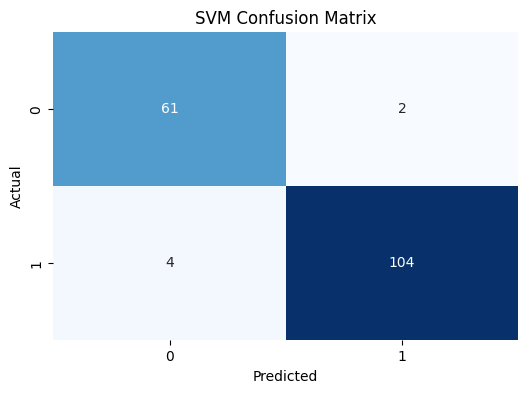

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



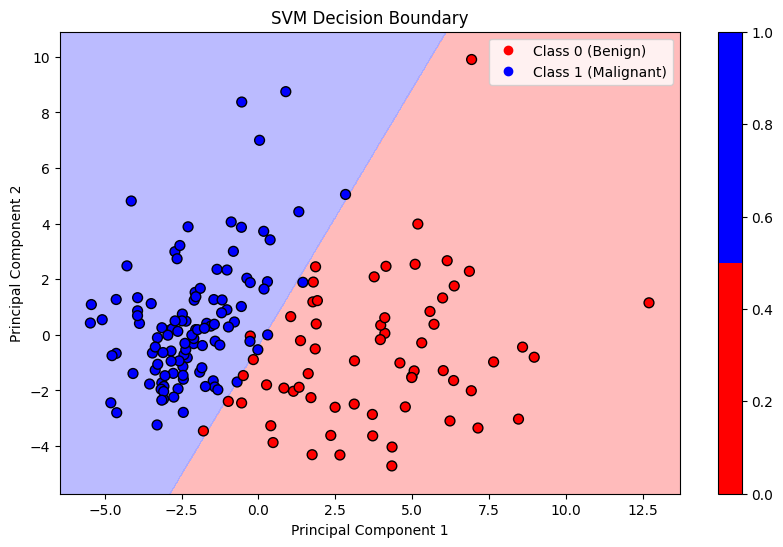

In [33]:
def plot_decision_boundary(X, y, model, title="SVM Decision Boundary"):
    # Create a meshgrid to plot the decision boundary
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict classifications for every point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the actual data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolors='k', s=50)

    # Add a color bar to distinguish between the two classes
    plt.colorbar(scatter)

    # Label the axes
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Add a title
    plt.title(title)

    # Show legend to differentiate between the classes
    handles, labels = scatter.legend_elements()
    plt.legend(handles, ["Class 0 (Benign)", "Class 1 (Malignant)"], loc="upper right")

    plt.show()

# Call the function to plot the decision boundary
plot_decision_boundary(X_test_pca, y_test, svm_model)